In [4]:
from pylab import *
import netCDF4
import numpy as np
import sys
from matplotlib import colors, ticker
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt

In [6]:
data = netCDF4.Dataset( 'data/cm1out.nc', 'r', format='NETCDF4')

In [36]:
# Import variables of interest
X = array(data.variables['ni'])         # radial grid values
Z = array(data.variables['nk'])         # vertical grid values
rain_fall = array(data.variables['rain']) # suface accumulated rainfall
prs = array(data.variables['prs'])        # pressure (all vertical levels)
surf_prs = array(data.variables['sps'])   # surface pressure
DH = array(data.variables['th9'])         # radial grid values
U = array(data.variables['uinterp'])      # radial velocity
V = array(data.variables['vinterp'])      # tangential velocity
W = array(data.variables['winterp'])      # vertical velocity

In [66]:
# reshape 4-dim variable to 3-dim (t,z,x)
U_T = U.reshape(U.shape[0],U.shape[1],U.shape[3])
V_T = V.reshape(V.shape[0],V.shape[1],V.shape[3])
W_T = W.reshape(W.shape[0],W.shape[1],W.shape[3])
DH_T = DH.reshape(DH.shape[0],DH.shape[1],DH.shape[3])
prs_T = prs.reshape(prs.shape[0],prs.shape[1],prs.shape[3])
# reshape 3-dim to 2-dim
s_prs_T = surf_prs.reshape(surf_prs.shape[0],surf_prs.shape[2])
s_rain = rain_fall.reshape(rain_fall.shape[0],rain_fall.shape[2])

# change pressure to mb (millibars)
prs_mb = prs_T/100
s_prs_mb = s_prs_T/100

(99,)

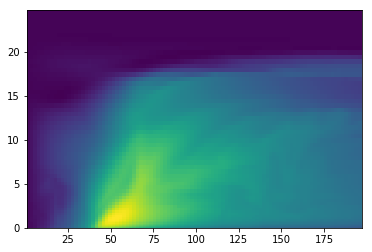

In [78]:
plt.pcolormesh(X[0:99],Z,V_T[100,:,0:99])

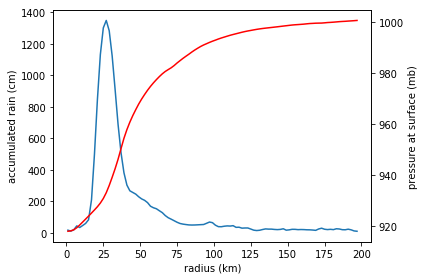

In [75]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('radius (km)')
ax1.set_ylabel('accumulated rain (cm)')
ax1.plot(X[0:99],s_rain[40,0:99])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure at surface (mb)')  # we already handled the x-label with ax1
ax2.plot(X[0:99],prs_mb[40,0,0:99],'r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [ ]:
# looking at correlation of variables with tangential wind and pressure
# Variables of interest are tangential velocity (V_T), vertical velocity (W_T), diabatic
#     heating (DH_T), pressure (prs_mb), and radial velocity (U_T)
